In [2]:
library("marmap") |> suppressPackageStartupMessages()

## Load Data

In [6]:
sites_tmp <- read.csv("../inputfiles/bft.strata", header = T)
sites <- unique(sites_tmp[,c(8,7)])
rownames(sites) <- unique(sites_tmp$pop4)
sites

,longitude,latitude
,<dbl>,<dbl>
BRZ,-34.2250,-6.438000
BRZSP,-29.3466,0.917214
KEY,-81.0050,24.767000
MRT,-61.1720,14.586000
PNS,-87.2140,30.066000
PR,-66.5360,18.915000
SCA,-78.9950,32.554000
TX,-95.5760,27.686000
VZ,-66.2290,11.491000


## Pull the bathymetric map for a given range

In [7]:
USbathy <- getNOAA.bathy(
    lon1 = -103, lon2 = -19,
    lat1 = 37, lat2 = -12, 
    resolution = 4
)

Querying NOAA database ...

This may take seconds to minutes, depending on grid size

Building bathy matrix ...



## Create Transition Matrix
- set `min.depth` to specify minimum depth path cannot traverse
- set `max.depth` to the maximum depth path cannot traverse
- using no arguments is effectively avoiding land masses

In [8]:
trans <- trans.mat(USbathy)

## Create least-cost distances
- `res = "path"` to output the least cost path
- `res = "dist"` to output the distance, in meters

In [9]:
lcpaths <- lc.dist(trans, sites, res = "path")
lcdists <- lc.dist(trans, sites, res = "dist")

  |======================================================================| 100%


### Plot
- not entirely necessary

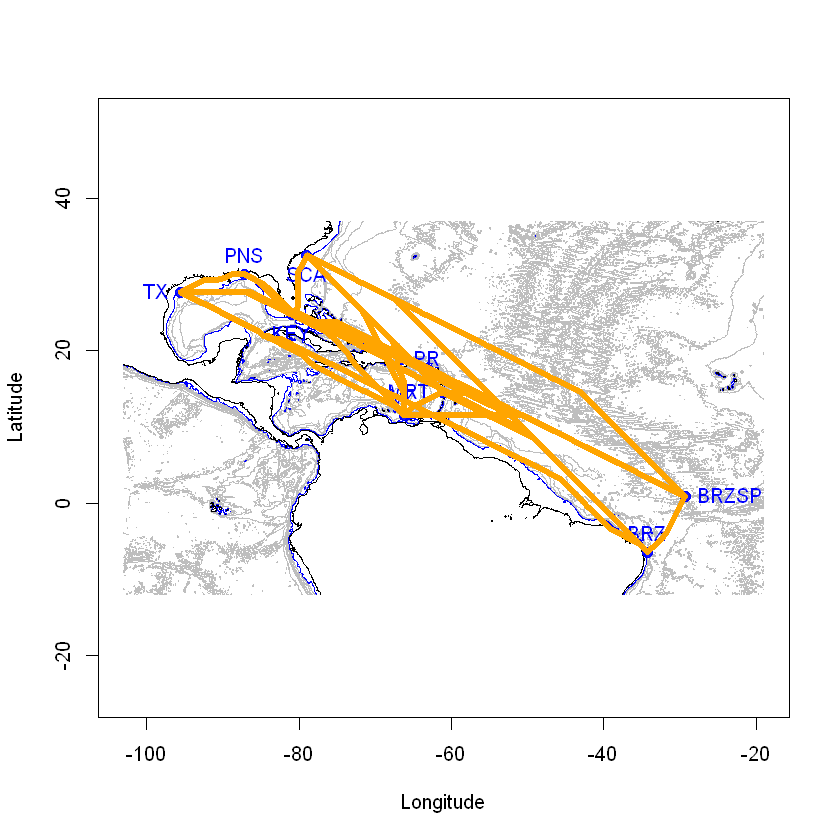

In [10]:
plot(
    USbathy, xlim = c(-103, -19), ylim = c(-12, 37),
    deep = c(-5000, -200, 0), shallow = c(-200, 0, 0),
    col = c("grey", "blue", "black"), step = c(1000, 200, 1),
    lty = c(1, 1, 1), lwd = c(0.6, 0.6, 1.2),
    draw = c(FALSE, FALSE, FALSE)
)
points(sites, pch = 21, col = "blue", bg = col2alpha("blue", .9), cex = 1.2)
text(
    sites[,1], sites[,2], lab = rownames(sites),
    pos = c(3, 4, 1, 2), col = "blue"
)
lapply(lcpaths, lines, col = "orange", lwd = 5, lty = 1) -> dummy

In [15]:
write.table(as.matrix(lcdists), file = "leastcost.distances", quote = F)